In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df=pd.read_csv('churn_prediction.csv')

In [3]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
networth='customer_nw_category'
dslt='days_since_last_transaction'
pmeb='previous_month_end_balance'
ambpq='average_monthly_balance_prevQ'
ambpq2='average_monthly_balance_prevQ2'
cmc='current_month_credit'
pmc='previous_month_credit'
cmd='current_month_debit'
pmd='previous_month_debit'
cmb='current_month_balance'
pmb='previous_month_balance'
cmcd='current_month_credit/debit'
pmcd='previous_month_credit/debit'
mg='monthly_gain'
qg='quartile_gain'
cb='current_balance'
gtm='gain_this_month'
ambc='average_monthly_balance_comparison'

In [13]:
df=df.drop(['customer_id','city','branch_code'],axis=1)
df

,vintage,age,gender,dependents,occupation,customer_nw_category,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,3135,66,Male,0.0,self_employed,2,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,310,35,Male,0.0,self_employed,2,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,2356,31,Male,0.0,salaried,2,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,478,90,NaN,NaN,self_employed,2,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,2531,42,Male,2.0,self_employed,3,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,Female,0.0,student,2,70.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,4919,34,Female,0.0,self_employed,2,14.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,297,47,Male,0.0,salaried,2,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,2585,50,Male,3.0,self_employed,3,NaN,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [6]:
df.isnull().sum()

vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
customer_nw_category                 0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [7]:
df=df.astype({'dependents':'object'})

In [14]:
#Imputing dependents and occupation with their mode
df['dependents']=df['dependents'].fillna(0)
df['occupation']=df['occupation'].fillna('self_employed')

In [15]:
#Getting rid of sparse classes of dependents
for i in range(len(df)):
    if df['dependents'][i]>2:
        df['dependents'][i]=3
df=df.astype({'dependents':'object'})
df['dependents']=df['dependents'].replace({0:'No dependent',1:'1 dependent',2:'2 dependent',3:'More than 2 dependents'})
df['dependents'].value_counts()

/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


No dependent              23898
2 dependent                2150
1 dependent                1395
More than 2 dependents      939
Name: dependents, dtype: int64

In [17]:
#Imputing gender
for i in range(len(df)):
    if pd.isnull(df['gender'][i])==True:
        if df['occupation'][i]=='retired':
            df['gender'][i]='Male'
        elif df['occupation'][i]=='salaried':
            df['gender'][i]='Male'
        elif df['customer_nw_category'][i]==3:
            df['gender'][i]='Male'
        elif df['dependents'][i]=='More than 2 dependents':
            df['gender'][i]='Male'
        else:
            df['gender'][i]='Female'

/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im

In [18]:
#Imputing days since last transaction
mean_days=np.mean(df['days_since_last_transaction'])
for i in range(len(df)):
    if pd.isnull(df['days_since_last_transaction'][i])==True:
        if df['dependents'][i]==0:
            df['days_since_last_transaction'][i]=74
        elif df['customer_nw_category'][i]==1:
            df['days_since_last_transaction'][i]=56
        elif df['occupation'][i]=='student':
            df['days_since_last_transaction'][i]=92
        else:
            df['days_since_last_transaction'][i]=mean_days

/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/home/asm01/miniconda3/envs/asm/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [19]:
df.isnull().sum()

vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
customer_nw_category              0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [20]:
#Converting dependents and nw to object
df=df.astype({'dependents':'object','customer_nw_category':'object'},copy=False)
df.dtypes

vintage                             int64
age                                 int64
gender                             object
dependents                         object
occupation                         object
customer_nw_category               object
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [21]:
#Splitting dependent and independent variables
x=df.drop(['churn'],axis=1)
y=df['churn']
x.shape,y.shape

((28382, 17), (28382,))

In [22]:
x=pd.get_dummies(x)
x

,vintage,age,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,...,dependents_More than 2 dependents,dependents_No dependent,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,3135,66,224.000000,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,...,0,1,0,0,0,1,0,0,1,0
1,310,35,60.000000,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,...,0,1,0,0,0,1,0,0,1,0
2,2356,31,69.997814,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,...,0,1,0,0,1,0,0,0,1,0
3,478,90,147.000000,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,...,0,1,0,0,0,1,0,0,1,0
4,2531,42,58.000000,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,1845,10,70.000000,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,...,0,1,0,0,0,0,1,0,1,0
28378,4919,34,14.000000,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,...,0,1,0,0,0,1,0,0,1,0
28379,297,47,0.000000,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,...,0,1,0,0,1,0,0,0,1,0
28380,2585,50,69.997814,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,...,1,0,0,0,0,1,0,0,0,1


In [21]:
y.tail()

28377    0
28378    0
28379    1
28380    0
28381    1
Name: churn, dtype: int64

In [113]:
a=np.zeros((28382,1))
dumb_pred=pd.DataFrame(a,columns=['churn'])
dumb_pred=dumb_pred.astype('int64')
print('F1 score is ', f1_score(dumb_pred,y),'\n')

F1 score is  0.0 



# Applying knn on data without any specific treatment

In [37]:
without_score_dict={'acc_score_train':0,'acc_score_test':0,
            'f1_score_precision_recall_train':(0,0,0,0),
           'f1_score_precision_recall_test':(0,0,0,0),
           'roc_auc_score_train':0,'roc_auc_score_test':0}

In [38]:
#Scaling the data using std scaler
from sklearn.preprocessing import StandardScaler as SS
scaler=SS()
scaled_x=scaler.fit_transform(x)
x=pd.DataFrame(scaled_x,columns=x.columns)
x

,vintage,age,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,...,dependents_2.0,dependents_3.0,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,0.478644,0.999147,1.889082,-0.139017,-0.141953,-0.144709,-0.127317,-0.044545,-0.109858,-0.070378,...,-0.286288,-0.184977,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,0.974396,-0.743959
1,-1.275909,-0.741756,-0.128143,-0.046720,0.028425,0.007249,0.118793,-0.044540,-0.109846,0.035155,...,-0.286288,-0.184977,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,0.974396,-0.743959
2,-0.005178,-0.966389,0.044059,-0.081398,-0.039514,-0.061991,-0.096652,-0.044539,-0.109844,0.045936,...,-0.286288,-0.184977,-0.037568,-0.277108,1.798219,-1.273441,-0.279606,-0.38784,0.974396,-0.743959
3,-1.171568,2.346943,0.941970,-0.119457,-0.122361,-0.129711,-0.137244,-0.044541,-0.109849,-0.070372,...,-0.286288,-0.184977,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,0.974396,-0.743959
4,0.103512,-0.348649,-0.152744,-0.151482,-0.143293,-0.140285,-0.117848,-0.044543,-0.085794,-0.059058,...,3.492983,-0.184977,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,-1.026277,1.344159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,-0.322550,-2.145710,-0.005142,-0.147991,-0.150942,-0.124974,-0.097286,-0.044543,-0.109854,-0.070376,...,-0.286288,-0.184977,-0.037568,-0.277108,-0.556106,-1.273441,3.576459,-0.38784,0.974396,-0.743959
28378,1.586653,-0.797914,-0.693951,-0.083019,-0.080571,-0.091741,-0.073105,-0.044525,-0.109787,-0.053049,...,-0.286288,-0.184977,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,0.974396,-0.743959
28379,-1.283983,-0.067858,-0.866153,1.364653,1.258489,1.101198,0.332060,0.016006,0.020930,-0.067145,...,-0.286288,-0.184977,-0.037568,-0.277108,1.798219,-1.273441,-0.279606,-0.38784,0.974396,-0.743959
28380,0.137050,0.100617,-0.005169,-0.135100,-0.138030,-0.139329,-0.118156,-0.044545,-0.109858,-0.070378,...,-0.286288,5.406087,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,-1.026277,1.344159


In [39]:
#Splitting the dataset
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y, random_state=55,stratify=y)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((21286, 27), (7096, 27), (21286,), (7096,))

In [40]:
K=25

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=K)
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [43]:
train_score=knn.score(train_x,train_y)
test_score=knn.score(test_x,test_y)
without_score_dict['acc_score_train']=train_score
without_score_dict['acc_score_test']=test_score
print('Training ',train_score,'\nTest ',test_score)

Training  0.8165930658648877 
Test  0.8152480270574972


In [44]:
from sklearn.metrics import precision_recall_fscore_support as f1_score
train_pred=knn.predict(train_x)
train_score=f1_score(train_pred,train_y,average='binary')
without_score_dict['f1_score_precision_recall_train']=train_score
test_pred=knn.predict(test_x)
test_score=f1_score(test_pred,test_y,average='binary')
without_score_dict['f1_score_precision_recall_test']=test_score
print('Training ',train_score,'\nTest ',test_score)

Training  (0.01926489226869455, 0.6846846846846847, 0.037475345167652864, None) 
Test  (0.01749049429657795, 0.5476190476190477, 0.03389830508474577, None)


In [45]:
from sklearn.metrics import roc_auc_score as ras
train_pred=knn.predict(train_x)
train_score=ras(train_pred,train_y)
without_score_dict['roc_auc_score_train']=train_score
test_pred=knn.predict(test_x)
test_score=ras(test_pred,test_y)
without_score_dict['roc_auc_score_test']=test_score
print('Training ',train_score,'\nTest ',test_score)

Training  0.7509846091664274 
Test  0.6822302779915482


In [48]:
for i in without_score_dict:
    print(i,': ',without_score_dict[i],'\n')

acc_score_train :  0.8165930658648877 

acc_score_test :  0.8152480270574972 

f1_score_precision_recall_train :  (0.01926489226869455, 0.6846846846846847, 0.037475345167652864, None) 

f1_score_precision_recall_test :  (0.01749049429657795, 0.5476190476190477, 0.03389830508474577, None) 

roc_auc_score_train :  0.7509846091664274 

roc_auc_score_test :  0.6822302779915482 



In [64]:
k=range(1,100,3)

In [65]:
train_error_list=[]
test_error_list=[]
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    train_score=knn.score(train_x,train_y)
    test_score=knn.score(test_x,test_y)
    train_error_list.append(1-train_score)
    test_error_list.append(1-test_score)

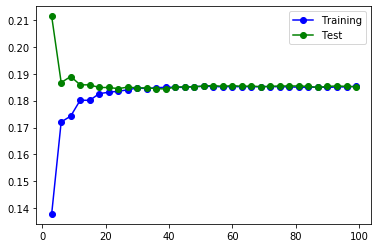

In [67]:
plt.plot(k,train_error_list,label='Training',color='blue',marker='o')
plt.plot(k,test_error_list,label='Test',color='green',marker='o')
plt.legend()

In [1]:
#Add the new features

In [75]:
df['current_month_credit/debit']=(df[cmc])/(df[cmd])
df['previous_month_credit/debit']=(df[pmc])/(df[pmd])
df['monthly_gain']=(df[cmb])-(df[pmb])
df['quartile_gain']=df[ambpq]-df[ambpq2]
df['gain_this_month']=df[cb]-df[pmeb]
df['average_monthly_balance_comparison']=(df[cmb]+3500)/(df[pmb]+5500)
df.shape

(28382, 24)

# Applying knn by adding above new features

In [59]:
new_features_score_dict={'acc_score_train':0,'acc_score_test':0,
            'f1_score_precision_recall_train':(0,0,0,0),
           'f1_score_precision_recall_test':(0,0,0,0),
           'roc_auc_score_train':0,'roc_auc_score_test':0}

In [23]:
#Scaling the data using std scaler
from sklearn.preprocessing import StandardScaler as SS
scaler=SS()
scaled_x=scaler.fit_transform(x)
x=pd.DataFrame(scaled_x,columns=x.columns)
x

,vintage,age,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,...,dependents_More than 2 dependents,dependents_No dependent,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,0.478644,0.999147,1.891483,-0.139017,-0.141953,-0.144709,-0.127317,-0.044545,-0.109858,-0.070378,...,-0.184977,0.433164,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,0.974396,-0.743959
1,-1.275909,-0.741756,-0.124695,-0.046720,0.028425,0.007249,0.118793,-0.044540,-0.109846,0.035155,...,-0.184977,0.433164,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,0.974396,-0.743959
2,-0.005178,-0.966389,-0.001784,-0.081398,-0.039514,-0.061991,-0.096652,-0.044539,-0.109844,0.045936,...,-0.184977,0.433164,-0.037568,-0.277108,1.798219,-1.273441,-0.279606,-0.38784,0.974396,-0.743959
3,-1.171568,2.346943,0.944863,-0.119457,-0.122361,-0.129711,-0.137244,-0.044541,-0.109849,-0.070372,...,-0.184977,0.433164,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,0.974396,-0.743959
4,0.103512,-0.348649,-0.149283,-0.151482,-0.143293,-0.140285,-0.117848,-0.044543,-0.085794,-0.059058,...,-0.184977,-2.308596,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,-1.026277,1.344159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,-0.322550,-2.145710,-0.001757,-0.147991,-0.150942,-0.124974,-0.097286,-0.044543,-0.109854,-0.070376,...,-0.184977,0.433164,-0.037568,-0.277108,-0.556106,-1.273441,3.576459,-0.38784,0.974396,-0.743959
28378,1.586653,-0.797914,-0.690209,-0.083019,-0.080571,-0.091741,-0.073105,-0.044525,-0.109787,-0.053049,...,-0.184977,0.433164,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,0.974396,-0.743959
28379,-1.283983,-0.067858,-0.862321,1.364653,1.258489,1.101198,0.332060,0.016006,0.020930,-0.067145,...,-0.184977,0.433164,-0.037568,-0.277108,1.798219,-1.273441,-0.279606,-0.38784,0.974396,-0.743959
28380,0.137050,0.100617,-0.001784,-0.135100,-0.138030,-0.139329,-0.118156,-0.044545,-0.109858,-0.070378,...,5.406087,-2.308596,-0.037568,-0.277108,-0.556106,0.785274,-0.279606,-0.38784,-1.026277,1.344159


In [60]:
#Splitting the dataset
from sklearn.model_selection import train_test_split as tts
train_x,test_x,train_y,test_y=tts(x,y, random_state=55,stratify=y)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((21286, 27), (7096, 27), (21286,), (7096,))

In [25]:
K=25

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=K)
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [82]:
train_score=knn.score(train_x,train_y)
test_score=knn.score(test_x,test_y)
new_features_score_dict['acc_score_train']=train_score
new_features_score_dict['acc_score_test']=test_score
print('Training ',train_score,'\nTest ',test_score)

Training  0.8271164145447713 
Test  0.8217305524239008


In [83]:
from sklearn.metrics import precision_recall_fscore_support as f1_score
train_pred=knn.predict(train_x)
train_score=f1_score(train_pred,train_y,average='binary')
new_features_score_dict['f1_score_precision_recall_train']=train_score
test_pred=knn.predict(test_x)
test_score=f1_score(test_pred,test_y,average='binary')
new_features_score_dict['f1_score_precision_recall_test']=test_score
print('Training ',train_score,'\nTest ',test_score)

Training  (0.0917617237008872, 0.7886710239651417, 0.16439600363306087, None) 
Test  (0.06768060836501902, 0.6953125, 0.12335412335412338, None)


In [84]:
from sklearn.metrics import roc_auc_score as ras
train_pred=knn.predict(train_x)
train_score=ras(train_pred,train_y)
new_features_score_dict['roc_auc_score_train']=train_score
test_pred=knn.predict(test_x)
test_score=ras(test_pred,test_y)
new_features_score_dict['roc_auc_score_test']=test_score
print('Training ',train_score,'\nTest ',test_score)

Training  0.8083173624651177 
Test  0.7596826564293915


In [26]:
k=range(1,100,3)

In [30]:
train_error_list=[]
test_error_list=[]
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x,train_y)
    train_score=knn.score(train_x,train_y)
    test_score=knn.score(test_x,test_y)
    train_error_list.append(1-train_score)
    test_error_list.append(1-test_score)

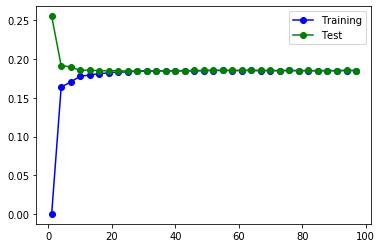

In [31]:
plt.plot(k,train_error_list,label='Training',color='blue',marker='o')
plt.plot(k,test_error_list,label='Test',color='green',marker='o')
plt.legend()

In [85]:
for i in new_features_score_dict:
    print(i,': ',new_features_score_dict[i],'\n')

acc_score_train :  0.8271164145447713 

acc_score_test :  0.8217305524239008 

f1_score_precision_recall_train :  (0.0917617237008872, 0.7886710239651417, 0.16439600363306087, None) 

f1_score_precision_recall_test :  (0.06768060836501902, 0.6953125, 0.12335412335412338, None) 

roc_auc_score_train :  0.8083173624651177 

roc_auc_score_test :  0.7596826564293915 



In [86]:
for i in without_score_dict:
    print(i,': ',without_score_dict[i],'\n')

acc_score_train :  0.8165930658648877 

acc_score_test :  0.8152480270574972 

f1_score_precision_recall_train :  (0.01926489226869455, 0.6846846846846847, 0.037475345167652864, None) 

f1_score_precision_recall_test :  (0.01749049429657795, 0.5476190476190477, 0.03389830508474577, None) 

roc_auc_score_train :  0.7509846091664274 

roc_auc_score_test :  0.6822302779915482 



# Applying knn using probabilities prediction

In [94]:
train_pred=knn.predict_proba(train_x)
train_pred=train_pred[:,1]
train_pred

array([0.08, 0.44, 0.16, ..., 0.2 , 0.24, 0.16])

In [95]:
test_pred=knn.predict_proba(test_x)
test_pred=test_pred[:,1]
test_pred

array([0.2 , 0.16, 0.12, ..., 0.12, 0.16, 0.12])

In [75]:
limit=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [96]:
train_pred1=train_pred
for i in range(len(train_pred)):
    if train_pred[i]>0.4:
        train_pred1[i]=1
    else:
        train_pred1[i]=0
test_pred1=test_pred
for i in range(len(test_pred)):
    if test_pred[i]>0.4:
        test_pred1[i]=1
    else:
        test_pred1[i]=0

In [97]:
train_score=f1_score(train_y,train_pred1)
test_score=f1_score(test_y,test_pred1)
print('Train score ',train_score,'\nTest score',test_score)

Train score  0.10190786412284783 
Test score 0.06351446718419196


In [77]:
train_score_list

[0.32113639138752087,
 0.32113639138752087,
 0.32113639138752087,
 0.32113639138752087,
 0.32113639138752087,
 0.32113639138752087,
 0.32113639138752087,
 0.32113639138752087,
 0.32113639138752087]

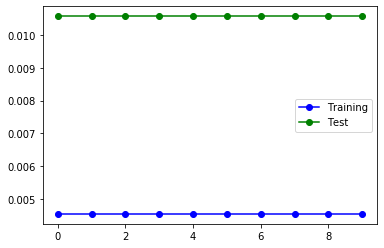

In [59]:
plt.plot(limit,train_score_list,label='Training',color='blue',marker='o')
plt.plot(limit,test_score_list,label='Test',color='green',marker='o')
plt.legend()

In [43]:
from sklearn.metrics import f1_score
train_score=f1_score(train_pred,train_y)
test_score=f1_score(test_pred,test_y)
print('Training score ',train_score,'\nTest Score ',test_score)

Training score  0.004547751389590703 
Test Score  0.010566037735849056
